In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

from pprint import pprint

In [2]:
path = r'C:\Users\Maurice\Desktop\Python\SixNations\GameRecords'
all_files = glob.glob(path + "/*.csv")

rugbyDF = pd.concat([pd.read_csv(f, encoding = "ISO-8859-1") for f in all_files], ignore_index=False)
rugbyDF.to_csv('masterfile.csv')
print(rugbyDF.describe())

         Unnamed: 0           Try    Try Assist    Conversion       Penalty  \
count  10375.000000  10375.000000  10375.000000  10375.000000  10375.000000   
mean      13.734458      0.109590      0.067277      0.073735      0.079133   
std       11.071762      0.357032      0.278917      0.460362      0.490515   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      0.000000      0.000000      0.000000      0.000000   
50%       12.000000      0.000000      0.000000      0.000000      0.000000   
75%       19.000000      0.000000      0.000000      0.000000      0.000000   
max       84.000000      4.000000      3.000000      9.000000      7.000000   

          Drop Goal        Points        Passes          Runs    Meters Run  \
count  10375.000000  10375.000000  10375.000000  10375.000000  10375.000000   
mean       0.002024      0.887904      5.456964      4.517398     15.215904   
std        0.044947      2.718859     13.060567    

In [3]:
rugbyDF['Date'] = rugbyDF['Date'].astype(str)
rugbyDF['DateTime'] = pd.to_datetime(rugbyDF['Date'], format='%Y%m%d')

rugbyDF['Net Points'] = rugbyDF['Points For'] - rugbyDF['Points Against']

In [4]:
#This function calculates the score that would be given by the IT for given metrics
def calcScore(DF):
    DF["ITScore"] = (DF["Try"]*10
                    +DF["Try Assist"]*5
                    +DF["Clean Breaks"]*5
                    +DF["Drop Goal"]*4
                    +DF["Offloads"]*4
                    +DF["Penalty"]*3
                    +DF["Conversion"]*2
                    +DF["Tackles"]*1
                    -DF["Missed Tackles"]*1
                    -DF["Yellow Cards"]*3
                    -DF["Red Cards"]*5)
    
def propBonus(DF):
    DF['ITScore'].loc[DF['Position'] == 'P'] = DF["Tackles"]*2
    DF['ITScore'].loc[DF['Position'] == 'H'] = DF["Tackles"]*2

def calcScore2(DF):
    DF["GUScore"] = (DF["Try"]*15
                    +DF["Defenders Beaten"]*2
                    +DF["Drop Goal"]*6
                    +DF["Meters Run"]*0.2
                    +DF["Penalty"]*3
                    +DF["Conversion"]*3
                    +DF["Tackles"]*1
                    +DF["Net Points"]*0.5
                    -DF["Yellow Cards"]*5
                    -DF["Red Cards"]*8)


In [5]:
sixNationsTeams = ['WALES', 'SCOT', 'ENG', 'IRE', 'FRA', 'ITALY']

sixNationsDF = rugbyDF.loc[(rugbyDF['Team'].isin(sixNationsTeams))]# & (rugbyDF['Opposition'].isin(sixNationsTeams))]
sixNationsDF = sixNationsDF[sixNationsDF.Name != 'S Evans']

calcScore(sixNationsDF)
calcScore2(sixNationsDF)

highscore = sixNationsDF.sort_values('ITScore', ascending=False)
#highscore["ITScore"].head(20).plot.bar()
x = list(range(0,21))
labels = highscore["Name"].head(20)
#plt.xticks(x, labels, rotation='vertical')

In [6]:
sixNationsDF.drop(['Unnamed: 0'], axis=1, inplace=True)
sixNationsDF.columns

Index(['Name', 'Position', 'Try', 'Try Assist', 'Conversion', 'Penalty',
       'Drop Goal', 'Points', 'Passes', 'Runs', 'Meters Run', 'Clean Breaks',
       'Defenders Beaten', 'Offloads', 'Turnovers Conceeded', 'Tackles',
       'Missed Tackles', 'Lineouts Won', 'Penalties', 'Yellow Cards',
       'Red Cards', 'Team', 'Opposition', 'Points For', 'Points Against',
       'Home/Away', 'Date', 'DateTime', 'Net Points', 'ITScore', 'GUScore'],
      dtype='object')

In [7]:
homeDF = sixNationsDF.loc[sixNationsDF['Home/Away'] == "Home"]
awayDF = sixNationsDF.loc[sixNationsDF['Home/Away'] == "Away"]

comparison = pd.concat([homeDF.mean(), awayDF.mean()], axis=1, join='inner')
comparison.columns = ["Home", "Away"]
print(comparison)

                          Home       Away
Try                   0.118654   0.093559
Try Assist            0.075718   0.059014
Conversion            0.091964   0.070529
Penalty               0.094575   0.085282
Drop Goal             0.002611   0.002159
Points                0.991297   0.776898
Passes                5.932695   5.426053
Runs                  4.711633   4.331054
Meters Run           15.445895  13.677582
Clean Breaks          0.318538   0.255128
Defenders Beaten      0.724978   0.645916
Offloads              0.297070   0.262684
Turnovers Conceeded   0.480998   0.480748
Tackles               5.026690   4.816841
Missed Tackles        0.671018   0.670385
Lineouts Won          0.433710   0.406981
Penalties             0.357412   0.357683
Yellow Cards          0.014215   0.013674
Red Cards             0.000290   0.001080
Points For           25.871482  21.612451
Points Against       20.361184  24.888449
Net Points            5.510299  -3.275999
ITScore               9.135770   8

In [8]:
playerList = sixNationsDF['Name'].unique()
uniquePlayerDFs = []
for p in playerList:
    pDF = sixNationsDF.loc[sixNationsDF['Name'] == p]
    pDF.name = p
    uniquePlayerDFs.append(pDF)
print(len(uniquePlayerDFs))

a = []
for p in uniquePlayerDFs:
    a.append([p.name, len(p)])
print(sorted(a, key=lambda x: x[1], reverse=True))

511
[['R Wilson', 47], ['L Williams', 46], ['G Ford', 45], ['D Toner', 43], ['J McGrath', 41], ['M Brown', 39], ['J Gray', 39], ['B Youngs', 38], ['S Hogg', 38], ['D Biggar', 37], ['D Cole', 37], ['C Murray', 37], ['A Jones', 36], ['D Hartley', 36], ['M Vunipola', 36], ['C Healy', 36], ['G Davies', 36], ['O Farrell', 36], ['R Slimani', 35], ['F Russell', 35], ['F Brown', 35], ['R Best', 35], ['T Francis', 35], ['J Tipuric', 34], ['J Joseph', 34], ['C Robshaw', 34], ['G Guirado', 34], ['K Owens', 34], ['D Care', 34], ['G North', 33], ['J Marler', 33], ['Y Maestri', 33], ['T Seymour', 33], ['P Horne', 33], ['K Earls', 33], ['J Launchbury', 33], ['T Faletau', 32], ['G Laidlaw', 32], ['C Lawes', 32], ['J George', 32], ['J Roberts', 31], ['R Henshaw', 31], ['J Sexton', 31], ['S Williams', 31], ['S Lee', 30], ['S Baldwin', 30], ['R Ford', 30], ['R Kearney', 30], ['T Swinson', 30], ['R Evans', 30], ['A Watson', 29], ['J May', 29], ['I Henderson', 29], ['C Canna', 29], ['L Ghiraldini', 28], ['

In [9]:
fivePlusPlayers = [p for p in uniquePlayerDFs if len(p)>4]
#print(len(fivePlusPlayers))
exampleDF = fivePlusPlayers[23]
window = 3
def rollingScores(DF):
    #DF['ITEWMR'] = DF['ITScore'].ewm(span=window, adjust=False).mean().shift(1)
    DF['ITRolling'] = DF['ITScore'].rolling(window).mean().shift(1)
    #DF['GUEWM'] = DF['GUScore'].ewm(span=window, adjust=False).mean().shift(1)
    DF['GURolling'] = DF['GUScore'].rolling(window).mean().shift(1)
    DF.fillna(method='bfill', inplace=True)
rollingScores(exampleDF)
print(exampleDF[['ITScore', 'ITRolling', 'GUScore', 'GURolling']])
#exampleDF[['ITScore', 'ITRolling', 'GUScore', 'GURolling']].plot(kind='bar')

    ITScore  ITRolling  GUScore  GURolling
23        5   8.333333     29.1  26.366667
0         0   8.333333     19.4  26.366667
0        20   8.333333     30.6  26.366667
0        17   8.333333     42.4  26.366667
32        0  12.333333     -2.5  30.800000
9        13  12.333333     24.8  23.500000
0        61  10.000000    105.2  21.566667
0        15  24.666667     19.1  42.500000
0        10  29.666667     13.8  49.700000
22        5  28.666667     33.1  46.033333
23        0  10.000000      3.0  22.000000
23        7   5.000000     25.9  16.633333
0        10   4.000000     20.5  20.666667
0        22   5.666667     45.8  16.466667
23       18  13.000000     31.4  30.733333
9         6  16.666667     20.2  32.566667
32        8  15.333333     31.3  32.466667
32       12  10.666667     26.6  27.633333
32       20   8.666667     48.6  26.033333
9        12  13.333333     34.4  35.500000
9        10  14.666667     40.5  36.533333
9         5  14.000000     24.2  41.166667
0        14

C:\Users\Maurice\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Maurice\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Maurice\Anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [10]:
corr_matrix1 = exampleDF.corr()

#print(corr_matrix1["ITScore"].sort_values(ascending=False))
#print(corr_matrix1["GUScore"].sort_values(ascending=False))

In [11]:
for p in fivePlusPlayers:
    rollingScores(p)
    
finalPlayerDF = pd.concat(fivePlusPlayers)
print(finalPlayerDF.describe())
finalPlayerDF.to_csv('fivePLusPlayers01.csv')

C:\Users\Maurice\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Maurice\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Maurice\Anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

               Try  Try Assist   Conversion      Penalty    Drop Goal  \
count  5879.000000  5879.00000  5879.000000  5879.000000  5879.000000   
mean      0.108522     0.07059     0.085899     0.095254     0.002551   
std       0.352593     0.28627     0.492824     0.546674     0.050452   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%       0.000000     0.00000     0.000000     0.000000     0.000000   
50%       0.000000     0.00000     0.000000     0.000000     0.000000   
75%       0.000000     0.00000     0.000000     0.000000     0.000000   
max       3.000000     3.00000     9.000000     7.000000     1.000000   

            Points       Passes         Runs   Meters Run  Clean Breaks  \
count  5879.000000  5879.000000  5879.000000  5879.000000   5879.000000   
mean      0.919884     5.899303     4.626977    14.831604      0.293417   
std       2.817618    13.806101     4.329036    22.733568      0.682356   
min       0.000000     0.000000     0.0000

In [12]:
positionDFs=[]
for p in sixNationsDF['Position'].unique():
        DF = sixNationsDF.loc[sixNationsDF['Position'] == p]
        DF.name = p
        positionDFs.append(DF)

print(len(positionDFs))
print(positionDFs[0].sample(5))
print(positionDFs[0].columns)

11
          Name Position  Try  Try Assist  Conversion  Penalty  Drop Goal  \
32      A Masi       FB    0           0           0        0          0   
23  E Padovani       FB    0           0           0        0          0   
23  G Anscombe       FB    0           0           0        1          0   
32     M Brown       FB    0           0           0        0          0   
33  B Kinghorn       FB    0           0           0        0          0   

    Points  Passes  Runs   ...      Team  Opposition  Points For  \
32       0       2     2   ...     ITALY       WALES          19   
23       0       1     9   ...     ITALY         ENG          15   
23       3      19    19   ...     WALES         ENG           6   
32       0       0     0   ...       ENG         FRA          20   
33       0       7    14   ...      SCOT       WALES          10   

    Points Against  Home/Away      Date   DateTime  Net Points  ITScore  \
32              23       Away  20150905 2015-09-05      

In [13]:
for pDF in positionDFs:
    individDF = pDF.groupby('Name').mean().sort_values('ITScore', ascending=False)
    individDF.drop('Try', axis=1, inplace=True)
    countDF = pDF.groupby('Name').count()['Try']
    individDF = pd.concat([individDF, countDF], axis=1).sort_values('ITScore', ascending=False)
    individDF.rename(columns={'Try': 'Appearances'}, inplace=True)
    individDF = individDF.loc[individDF['Appearances'] > 5]
    print(pDF.name)
    print(individDF[[ 'Appearances', 'Points', 'Try Assist', 'Passes', 'Tackles','Missed Tackles', 'Meters Run', 'Defenders Beaten', 'Net Points', 'ITScore']].head(10))
    print()

FB
             Appearances     Points  Try Assist    Passes   Tackles  \
M Minozzi              6   3.333333    0.000000  2.666667  2.166667   
L Halfpenny           23  11.347826    0.217391  4.478261  2.913043   
B Dulin                7   0.714286    0.285714  7.285714  2.428571   
E Daly                 7   2.714286    0.285714  4.000000  3.142857   
S Hogg                38   1.421053    0.263158  4.763158  2.026316   
S Spedding            19   1.210526    0.157895  6.894737  1.526316   
M Brown               33   0.606061    0.181818  3.696970  2.272727   
G Anscombe             6   0.500000    0.333333  8.000000  3.666667   
M Médard               6   0.833333    0.000000  3.833333  0.166667   
S Zebo                 8   0.000000    0.375000  6.125000  1.500000   

             Missed Tackles  Meters Run  Defenders Beaten  Net Points  \
M Minozzi          1.000000   58.833333          3.000000  -21.333333   
L Halfpenny        0.434783   35.347826          1.260870    3.652174

In [14]:
playerDF = sixNationsDF.groupby(['Name']).sum()
IT15 = (playerDF.sort_values('ITScore', ascending=False)['ITScore'].head(15))
GU15 = (playerDF.sort_values('GUScore', ascending=False)['GUScore'].head(15))

top15Combined = IT15.index.tolist() + GU15.index.tolist()
def uniqueItems(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

topNames = uniqueItems(top15Combined)[:15]

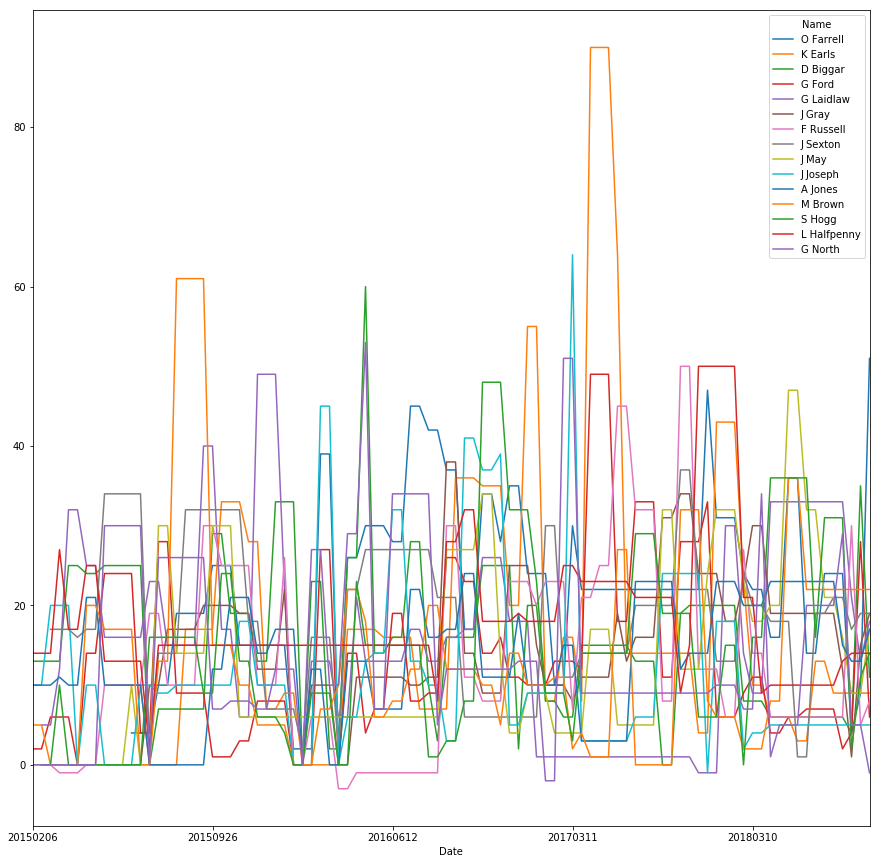

In [15]:
playerDF2 = sixNationsDF.groupby(['Date','Name']).mean()
table2 = playerDF2['ITScore'].unstack()
table2.fillna(method='ffill', inplace=True)
table2[topNames].plot()

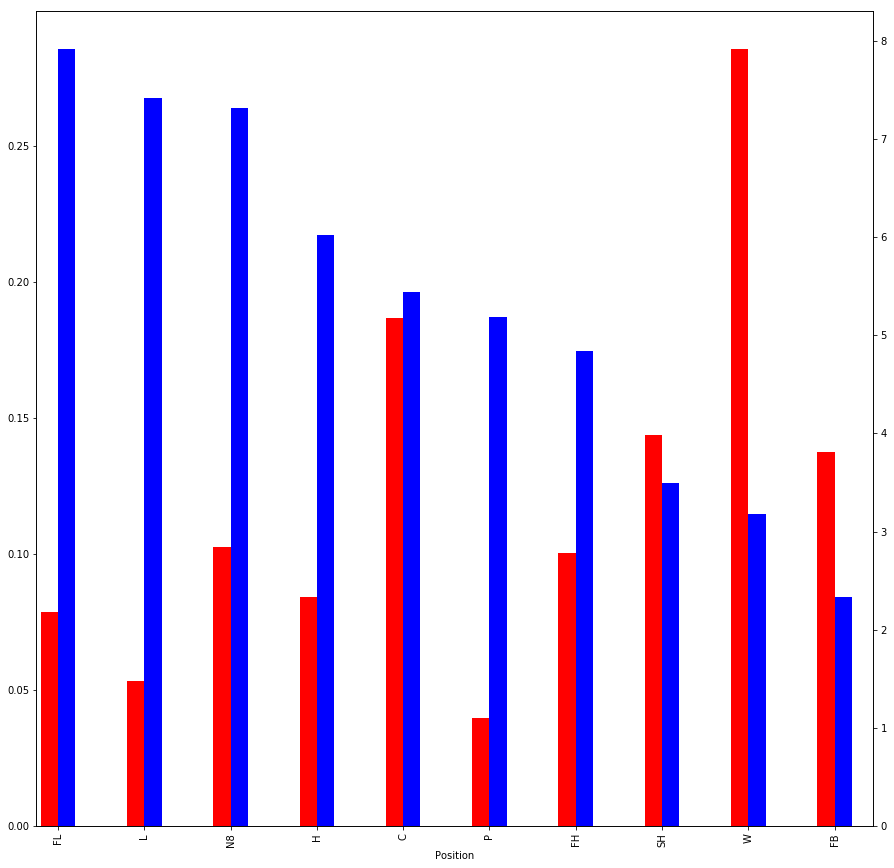

In [16]:
positionDF = sixNationsDF.groupby('Position').mean()
positionDF.drop(['R'], inplace=True)
positionDF.sort_values('Tackles', ascending=False, inplace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

positionDF.Try.plot(kind='bar', color='red', ax=ax, width=width, position=1)
positionDF.Tackles.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

plt.show()

In [17]:
propDF = sixNationsDF.loc[sixNationsDF['Position'] == 'P']
pprint(propDF.sort_values('ITScore', ascending=False)[['Name', 'Date', 'Try', 'Tackles', 'Runs', 'Team', 'Opposition', 'ITScore']].head(25))

           Name      Date  Try  Tackles  Runs   Team Opposition  ITScore
70     G Turner  20180610    3        5     8   SCOT        CAN       53
0   L Picamoles  20171119    0       25    16    FRA         SA       48
29    T Faletau  20160612    1       13     9  WALES        NZL       36
5    S Simmonds  20171125    0       14    18    ENG      SAMOA       27
33       C Hill  20171125    0       12     9  WALES        NZL       24
9   M Hamadache  20171114    0       14     4    FRA        NZL       23
30     V Debaty  20150321    1        6     9    FRA        ENG       23
4        J King  20161119    0       15    12  WALES        JPN       23
6     T Furlong  20171125    0       17     4    IRE        ARG       22
32    T Furlong  20180317    0       18    12    IRE        ENG       22
6    K Sinckler  20181124    0        5    11    ENG        AUS       22
29   M Vunipola  20160626    0       18     6    ENG        AUS       21
46   T Pasquali  20180609    1        6     2  ITAL

Team            ENG        FRA        IRE      ITALY       SCOT      WALES
Date                                                                      
20150206   5.000000        NaN        NaN        NaN        NaN  -5.000000
20150207  17.500000   7.000000  23.000000 -23.000000  -7.000000  -2.333333
20150214  30.000000  -7.000000   7.000000 -30.000000  -5.000000   0.333333
20150215  16.666667  -7.000000   8.000000 -13.500000  -3.000000   3.000000
20150228   3.333333  -7.000000   9.000000   3.000000  -3.000000   7.000000
20150301 -10.000000   5.000000  10.000000  -7.666667  -7.500000   7.000000
20150314  12.000000  17.000000  -7.000000 -18.333333 -12.000000   7.000000
20150315  16.000000  29.000000  11.500000 -29.000000 -21.000000  24.000000
20150321  20.000000 -20.000000  30.000000 -41.000000 -30.000000  41.000000
20150808  15.000000 -15.000000  14.000000 -31.750000 -18.000000 -14.000000
20150815  10.000000 -10.000000   6.000000 -22.500000  -6.000000  -9.000000
20150816   5.000000  -5.0

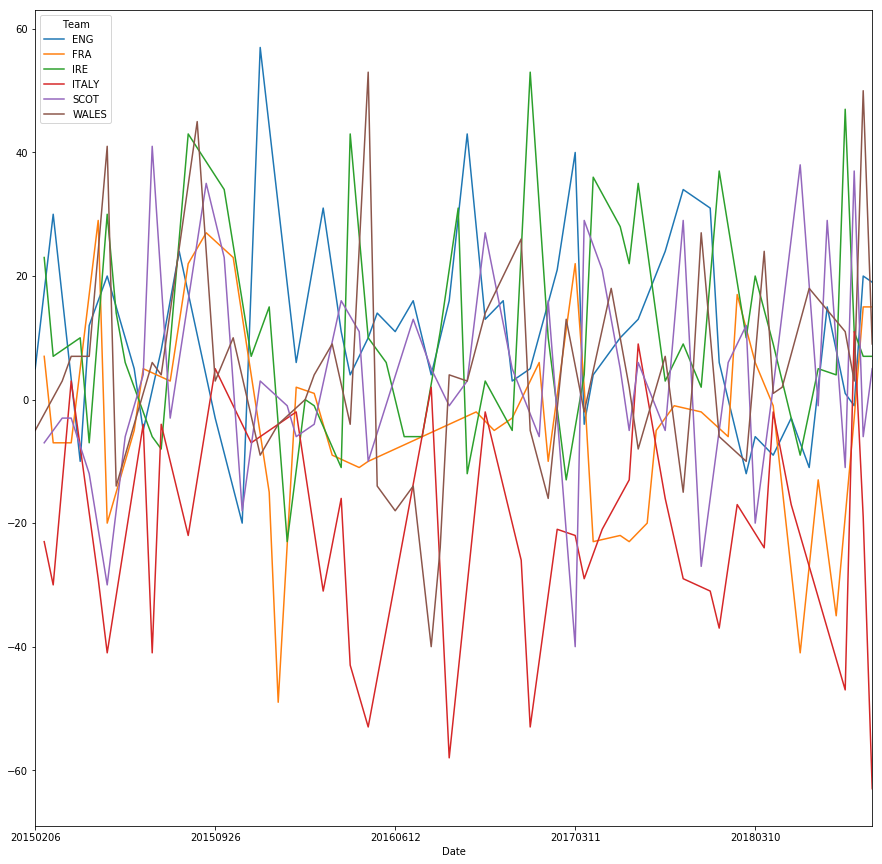

In [18]:
teamDF = sixNationsDF.groupby(['Date', 'Team']).mean()
netScoreTable = teamDF['Net Points'].unstack()
#pprint(netScoreTable)


teamNets = []
for team in netScoreTable.columns.values:
    team = netScoreTable[team].copy()
    team.dropna(inplace=True)
    #pprint(team)
    teamNets.append(team)

#fig, ax = plt.subplots(figsize=(16,9))
#for t in teamNets:
#    t.plot(ax=ax, label=t.name)
#ax.legend(loc='best')

#netScoreTable.fillna(method='ffill', inplace=True)
netScoreTable.interpolate(inplace=True)
pprint(netScoreTable)
netScoreTable.plot()

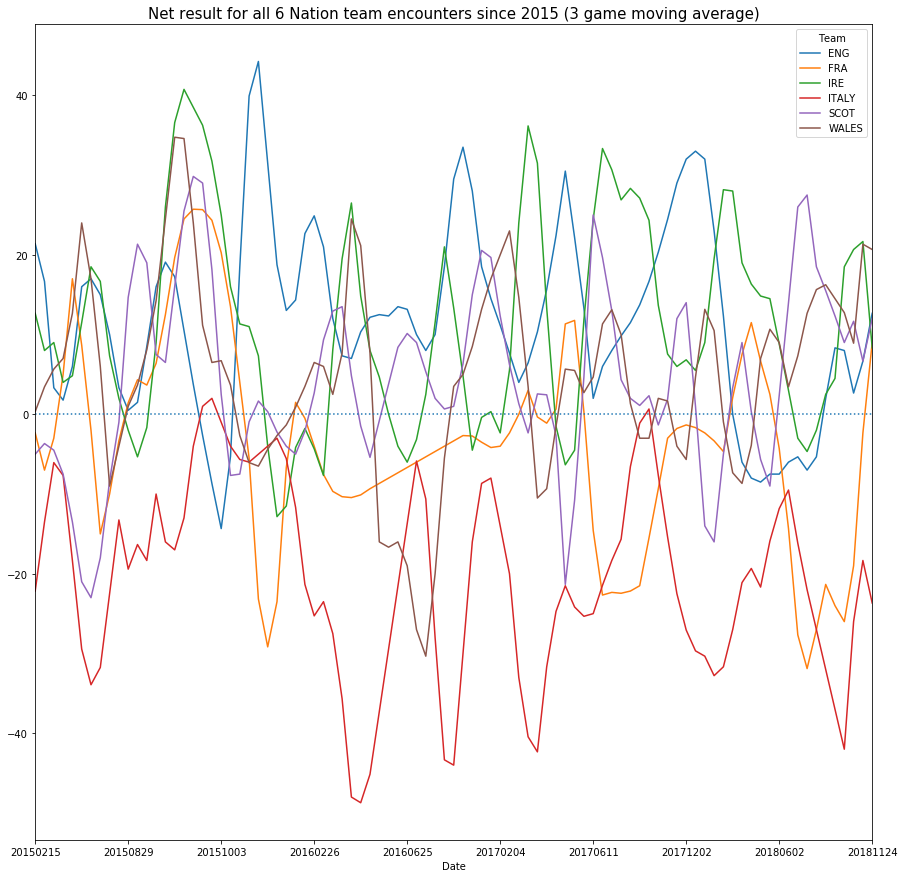

In [19]:
rollingNetTable = netScoreTable.copy()

window = 3
for c in rollingNetTable.columns.values:
    rollingNetTable[c] = rollingNetTable.rolling(window).mean()[c]
#pprint(rollingNetTable)
rollingNetTable[window:].plot()
plt.title(r"Net result for all 6 Nation team encounters since 2015 ("+str(window)+r" game moving average)", size=15)
plt.axhline(linestyle=":")

In [20]:
corr_matrix = sixNationsDF.corr()

print(corr_matrix["ITScore"].sort_values(ascending=False))
print(corr_matrix["GUScore"].sort_values(ascending=False))

ITScore                1.000000
GUScore                0.730570
Clean Breaks           0.672477
Points                 0.600917
Try                    0.592680
Meters Run             0.577520
Runs                   0.562219
Tackles                0.553949
Offloads               0.508760
Defenders Beaten       0.489365
Try Assist             0.375797
Turnovers Conceeded    0.292977
Penalty                0.247584
Conversion             0.246401
Passes                 0.245214
Points For             0.232204
Missed Tackles         0.187172
Net Points             0.172774
Penalties              0.134760
Drop Goal              0.048791
Lineouts Won           0.014377
Red Cards             -0.024848
Points Against        -0.035324
Yellow Cards          -0.043661
Name: ITScore, dtype: float64
GUScore                1.000000
ITScore                0.730570
Net Points             0.724101
Points For             0.642686
Meters Run             0.602724
Try                    0.570554
Clean Brea

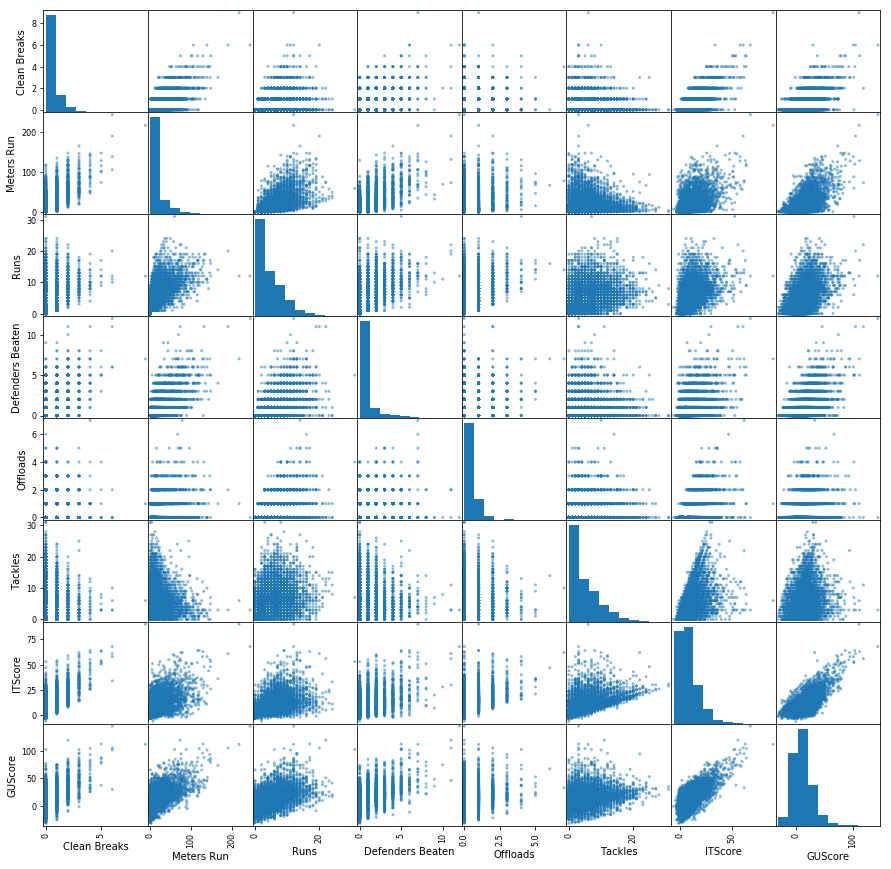

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['Clean Breaks', 'Meters Run', 'Runs', 'Defenders Beaten', 'Offloads', 'Tackles', 'ITScore', 'GUScore']
scatter_matrix(sixNationsDF[attributes], figsize=(15, 15))
plt.show()

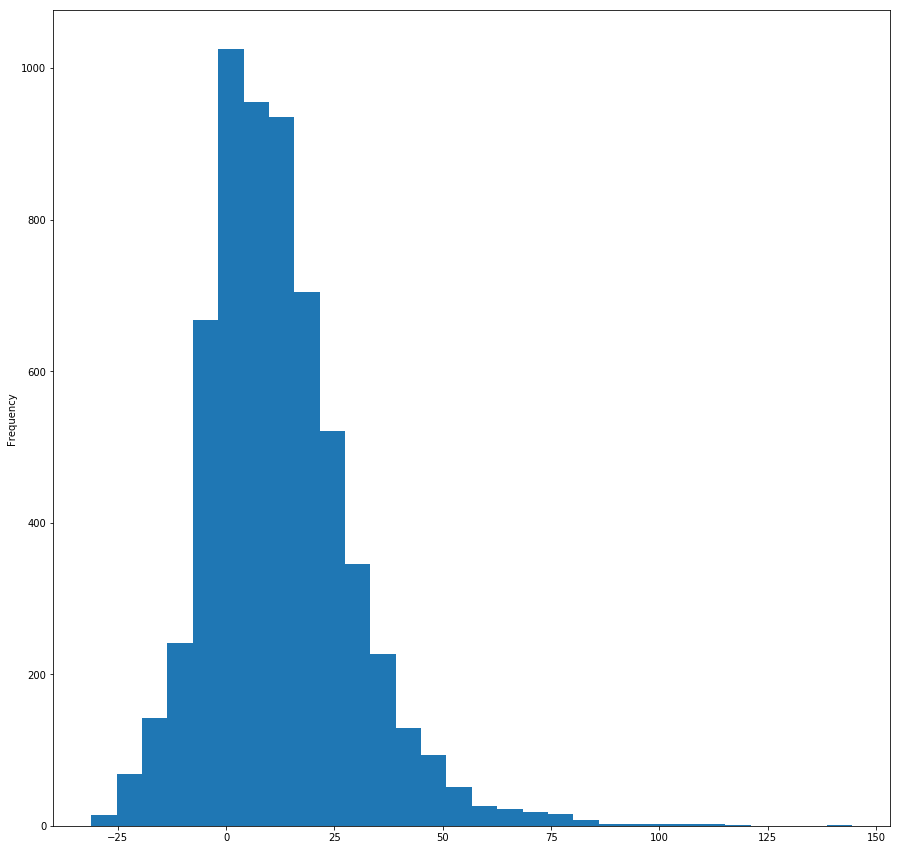

In [22]:
sixNationsDF['GUScore'].plot(kind='hist', bins=30)

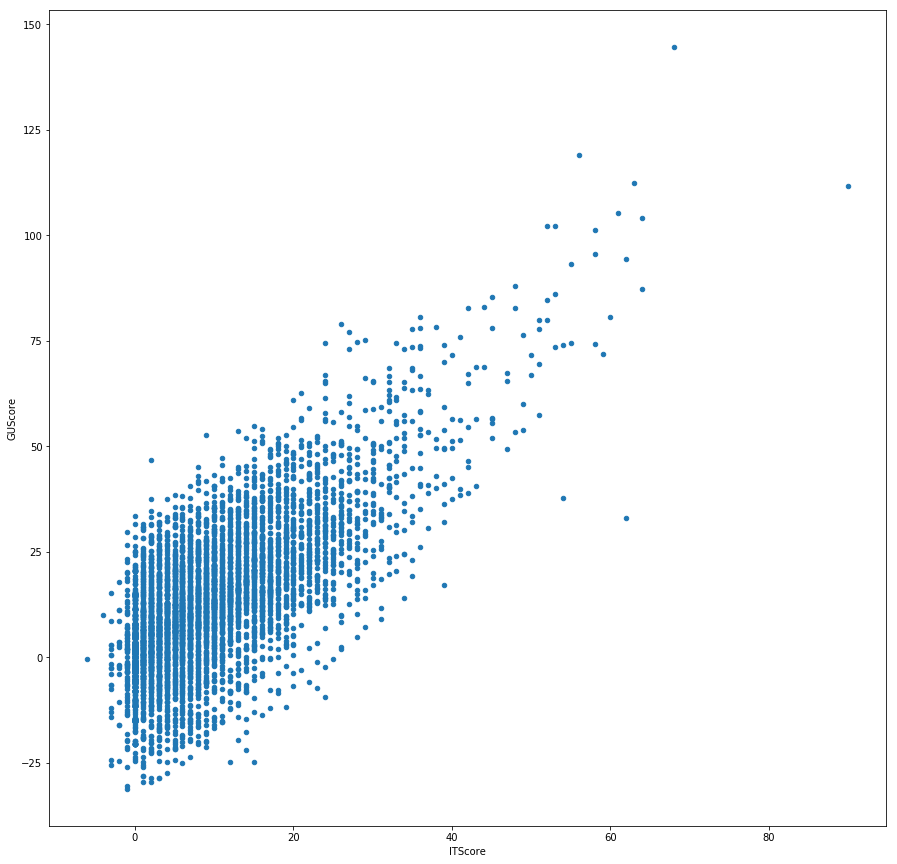

In [23]:
sixNationsDF.plot.scatter("ITScore", "GUScore")